# **Import necessary packages**

In [1]:
# packages for data
import numpy as np
import pandas as pd

#machine learning packages for tree-based models
import sklearn
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#machine learning packages for logistic regression
from sklearn.linear_model import LogisticRegression

#packages for visualization
import matplotlib.pyplot as plt
%matplotlib inline

#packages for evaluation
from sklearn.metrics import confusion_matrix

#classification report
from sklearn.metrics import classification_report

#ROC curve
from sklearn.metrics import roc_curve, roc_auc_score

#Grid search CV
from sklearn.model_selection import GridSearchCV

#K-fold cross-validation
from sklearn.model_selection import KFold, cross_val_score

# **Import Data**

In [2]:
#Import data from drive
file_path = '/content/drive/My Drive/Diabetes.csv'
Diabetes = pd.read_csv(file_path)

In [3]:
#Check dataset info and shape
Diabetes.info(), Diabetes.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4949 entries, 0 to 4948
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HighBP                4949 non-null   int64  
 1   HighChol              4949 non-null   int64  
 2   CholCheck             4949 non-null   int64  
 3   Smoker                4949 non-null   int64  
 4   Stroke                4949 non-null   int64  
 5   HeartDiseaseorAttack  4949 non-null   int64  
 6   PhysActivity          4949 non-null   int64  
 7   Fruits                4949 non-null   int64  
 8   Veggies               4949 non-null   int64  
 9   HvyAlcoholConsump     4949 non-null   int64  
 10  AnyHealthcare         4949 non-null   int64  
 11  NoDocbcCost           4949 non-null   int64  
 12  GenHlth               4949 non-null   int64  
 13  DiffWalk              4949 non-null   int64  
 14  Sex                   4949 non-null   int64  
 15  Age                  

(None, (4949, 22))

# **Splitting Training and Testing Data**

In [4]:
#Column names of dataset
columns = Diabetes.columns

In [5]:
#Target outcome
target = 'Diabetes_binary'

#Numerical Feature
num = ['BMI_normalized']

#Categorical Features
cats = columns[~columns.isin(num) & ~columns.isin([target])]

In [6]:
#Create new data frame named "Dia_X" by concatenaitng numerical featrues and categorical features
dia_X = pd.concat([Diabetes[num], Diabetes[cats]], axis = 1)

#Target variable column
dia_y = Diabetes[target]

# Create split with Sklearn, 70% of data for training, 30% for testing, random_state = 66
X_train, X_test, y_train, y_test  = train_test_split(dia_X, dia_y, test_size = 0.3,random_state = 66)

#Check the shape of train set and test set
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3464, 21), (3464,), (1485, 21), (1485,))

# **Re-calculate Model's Performance using Different Evaluation Metrics**
* The models that had the highest performance in P2.1_DT and P2.2_linear will be used in this section.

## **Decision Tree Classifier**

In [7]:
#Create a DecisionTreeClassifier with random_state=66, criterion = gini, max_depth = 5, max_feature = log2, min_samples_leaf = 2, min_samples_split = 2, splitter = best
dtc = tree.DecisionTreeClassifier(random_state=66, criterion ='gini', max_depth = 5, max_features ='log2', min_samples_leaf= 2, min_samples_split= 2, splitter= 'best')

#Fit the DecisionTreeClassifier with training data
dtc.fit(X_train,y_train)

#Accuracy of the model, round to 3 decimals
np.round(dtc.score(X_test, y_test),3)

0.861

**Confusion Matrix**

In [8]:
#Number of actual positive in negative in testing data/unseen data
print(f"Number of actual negative: {sum(y_test == 0)}")
print(f"Number of actual positive: {sum(y_test == 1)}")

Number of actual negative: 1274
Number of actual positive: 211


In [9]:
#Predict the outcome by using trained model on testing/unseen data
y_pred_dtc = dtc.predict(X_test)

# Obtain true negative, false positive, false negative, and true positive of the model
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_dtc ,labels=[0,1]).ravel()
tn, fp, fn, tp

(1239, 35, 172, 39)

**Classification Report**

In [10]:
#Obtain the precision, recall, and f1-score of the trained model
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1274
           1       0.53      0.18      0.27       211

    accuracy                           0.86      1485
   macro avg       0.70      0.58      0.60      1485
weighted avg       0.83      0.86      0.83      1485



**Precision (for the positive class)**: True positive/Predicted positive: Out of the positive cases predicted by the model, how many of them are true positive?

**Recall (for the positive class)**: True positive/Actual positive: Out of all the actual positive cases, how many of them are correctly identified by the model?

**F1 (for the positive class)**: (2* precision * recall) / (precision + recall)

**Positive class**
* Precision : 0.53
* Recall: 0.18
* F1 score: 0.27

**Negative class**
* Precision: 0.88
* Recall: 0.97
* F1 score: 0.92

**Discussion:**
* Even though the decision tree classifier has a accuracy of 0.86, the precision, recall, and f1 score are low for positive class. The model appears to perform significantly better when identifying negative class than the positive class, which may due to class imbalance in the training data.

**ROC curve**

In [11]:
# Get probability estimates of the positive class (second column)
y_score_dtc = dtc.predict_proba(X_test)[:, 1]
y_score_dtc

array([0.01006711, 0.02463054, 0.02463054, ..., 0.12727273, 0.01006711,
       0.01006711])

In [23]:
# Obtain false positive rate, true positive rate (sensitivity/recall), and thresholds value of TN/TP
# false positive rate: the ratio between the number of negative events wrongly categorized as positive and the total number of actual negative events
# true positive rate: the ratio between the number of true cases correctly categorized as positive and the total number of actual positive cases
fpr, tpr, thresholds = roc_curve(y_test, y_score_dtc, pos_label=1)

In [14]:
#Compute area under the ROC from prediciton scores
#y_test: true labels from the testing data
#y_score_dtc: target scores (label = 1)
roc_score = roc_auc_score(y_test, y_score_dtc)
roc_score

0.7563575557820649

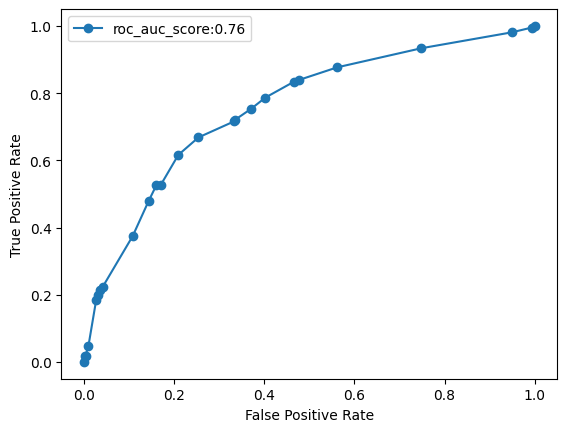

In [15]:
#ROC curve visualization
plt.plot(fpr,tpr,'o-',label="roc_auc_score:"+str(roc_score.round(2)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

**Discussion:**
* The ROC curve and AUC value of 0.76 shows a fair model's performance in separating two labels.
* The ideal decision threshold is approximately (0.30, 0.70)

## **Random Forest Classifier**

In [16]:
#Create a random forest classifier object with random_state = 66, n_estimators = 20, criterion = gini, max_depth = 30, and max_features = 'sqrt'
rfc = RandomForestClassifier(random_state=66, n_estimators = 20, criterion = 'gini', max_depth = 30, max_features = 'sqrt')

#Fit the model with training data
rfc.fit(X_train, y_train)

#Evalute the accuracy of the model
np.round(rfc.score(X_test, y_test),3)

0.867

**Confusion Matrix**

In [17]:
#Predict the outcome by using trained model on testing/unseen data
y_pred_rfc = rfc.predict(X_test)

# Obtain true negative, false positive, false negative, and true positive of the model
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rfc ,labels=[0,1]).ravel()
tn, fp, fn, tp

(1255, 19, 179, 32)

**Classification Report**

In [18]:
#Obtain the precision, recall, and f1-score of the trained model
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1274
           1       0.63      0.15      0.24       211

    accuracy                           0.87      1485
   macro avg       0.75      0.57      0.59      1485
weighted avg       0.84      0.87      0.83      1485



**Positive class**
* Precision : 0.63
* Recall: 0.15
* F1 score: 0.24

**Negative class**
* Precision: 0.88
* Recall: 0.99
* F1 score: 0.93

**Discussion:**
* Similar to the result of decision tree classifier, the random forest classifier does not perform well in identifying positive class in this dataset.


**ROC Curve**

In [25]:
# Get probability estimates of the positive class
y_score_rfc = rfc.predict_proba(X_test)[:, 1]
y_score_rfc

array([0.  , 0.  , 0.  , ..., 0.15, 0.05, 0.1 ])

In [26]:
# Obtain false positive rate, true positive rate (sensitivity/recall), and thresholds value of TN/TP
fpr, tpr, thresholds = roc_curve(y_test, y_score_rfc, pos_label=1)

In [27]:
#Compute the area under the curce
roc_score = roc_auc_score(y_test, y_score_rfc)
roc_score

0.7937626016502117

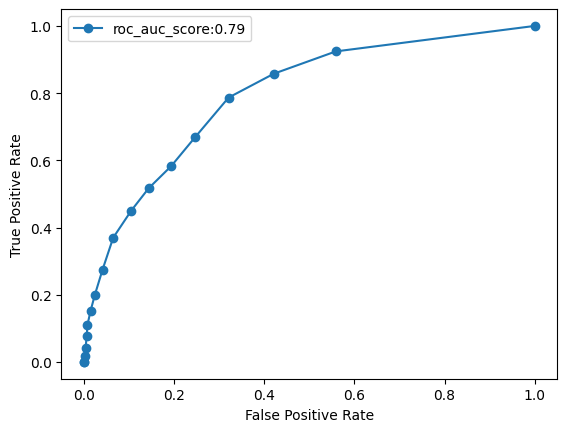

In [28]:
#ROC curve visualization
plt.plot(fpr,tpr,'o-',label="roc_auc_score:"+str(roc_score.round(2)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

**Discussion**
* The ideal decision threshold is approximately (0.25, 0.75), which is similar to that of the decision tree classifier.

## **Logistic Regression**

In [29]:
#Create a logistic regression object with random_state = 66, max_iter = 1000, solver = saga, and penalty = l1
logr = LogisticRegression(random_state=66, max_iter=1000, solver='saga', C=1.0, penalty='l1')

#Fit the model with training data
logr.fit(X_train, y_train)

#Evalute the accuracy of the model
np.round(logr.score(X_test, y_test),3)

0.867

**Confusion Matrix**

In [30]:
#Predict the outcome by using trained model on testing/unseen data
y_pred_logr = logr.predict(X_test)

# Obtain true negative, false positive, false negative, and true positive of the model
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_logr ,labels=[0,1]).ravel()
tn, fp, fn, tp

(1256, 18, 179, 32)

**Classification Report**

In [31]:
#Obtain the precision, recall, and f1-score of the trained model
print(classification_report(y_test, y_pred_logr))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1274
           1       0.64      0.15      0.25       211

    accuracy                           0.87      1485
   macro avg       0.76      0.57      0.59      1485
weighted avg       0.84      0.87      0.83      1485



**Positive class**
* Precision : 0.64
* Recall: 0.15
* F1 score: 0.25

**Negative class**
* Precision: 0.88
* Recall: 0.99
* F1 score: 0.93

**Discussion**
* Similar to the results of the previous two models, the logistic regresison model does not perform well when predicting the positive class.

**ROC Curve**

In [32]:
# Get probability estimates of the positive class
y_score_logr = logr.predict_proba(X_test)[:, 1]
y_score_logr

array([0.02193872, 0.01726641, 0.01882398, ..., 0.0797359 , 0.07554198,
       0.06946285])

In [33]:
# Obtain false positive rate, true positive rate (sensitivity/recell), and thresholds value of TN/TP
fpr, tpr, thresholds = roc_curve(y_test, y_score_logr, pos_label=1)

In [34]:
#Area under the curce
roc_score = roc_auc_score(y_test, y_score_logr)
roc_score

0.8224199632459619

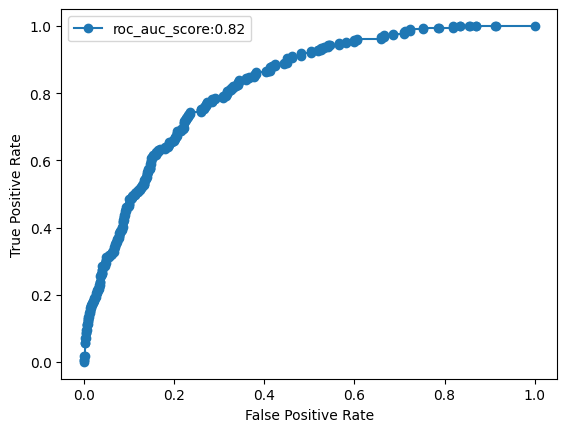

In [35]:
#ROC curve visualization
plt.plot(fpr,tpr,'o-',label="roc_auc_score:"+str(roc_score.round(2)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

**Discussion**
* The AUC score of the logistic regression model(0.82) is the highest among the three models, which indicates a better ability to distinguish between the positive and negative classes.
* The ideal decision threshold is approximately (0.22, 0.78)

# **Hyperparameter Tuning (GridSearchCV) & K-fold cross-validation**


## **Decision Tree Classifier**

In [39]:
#Create a decision tree classifier with random_state = 66 and default setting
dtc_tuned = tree.DecisionTreeClassifier(random_state=66)

#Setting up a paramter grid for hyperparameter tuning
parameters_dtc = {'max_depth':[2,3,5,7,10,15],
          'min_samples_leaf':[2,3,5,10,15,20],
          'min_samples_split':[2,8,10,12,18,20,16],
          'criterion':['gini','entropy'],
          'splitter': ['best', 'random']}

#Create GridSearchCV object with decision tree classifier model
grid_cv_dtc = GridSearchCV(estimator = dtc_tuned, param_grid = parameters_dtc, cv = 5)

#Fit the model with the entire dataset instead of training data
#cv = 5: 5-fold cross-validation
grid_cv_dtc.fit(dia_X, dia_y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=66),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 7, 10, 15],
                         'min_samples_leaf': [2, 3, 5, 10, 15, 20],
                         'min_samples_split': [2, 8, 10, 12, 18, 20, 16],
                         'splitter': ['best', 'random']})

In [41]:
# The mean cross-validated score of the best_estimator
grid_cv_dtc.best_score_

0.8688615170920532

In [42]:
#The combination of parameters that resulted in the best score
grid_cv_dtc.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 20,
 'min_samples_split': 2,
 'splitter': 'best'}

In [43]:
#Perform cross-validaiton with the best estimator from the grid search
#5-fold
kf_dtc = KFold(n_splits = 5)

#Using the entire dataset to perform cross-validation
cv_scores_dtc = cross_val_score(grid_cv_dtc, dia_X, dia_y, cv = kf_dtc)
cv_scores_dtc

array([0.86161616, 0.86161616, 0.87777778, 0.86969697, 0.86450961])

In [44]:
#The mean cross-validation score
cv_scores_dtc.mean()

0.8670433352738712

## **Random Forest Classifier**

In [45]:
#Create a random forest classifier with random_state = 66 and default setting
rfc_tuned = RandomForestClassifier(random_state = 66)

#Setting up a paramter grid for hyperparameter tuning
parameters_rfc = {'n_estimators': [20, 50, 100, 150],
                   'max_features': ['sqrt', 'log2', None],
                   'max_depth': [3, 6, 9],
                   'max_leaf_nodes': [3, 6, 9],
                    }

#Create GridSearchCV object with random forest classifier model
grid_cv_rfc = GridSearchCV(estimator = rfc_tuned, param_grid = parameters_rfc, cv=5)

#Fit the data with the entire dataset
grid_cv_rfc.fit(dia_X, dia_y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=66),
             param_grid={'max_depth': [3, 6, 9],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [3, 6, 9],
                         'n_estimators': [20, 50, 100, 150]})

In [46]:
#The mean cross-validated score of the best_estimator
grid_cv_rfc.best_score_

0.8692671916332179

In [47]:
#The combination of parameters that resulted in the best score
grid_cv_rfc.best_params_

{'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': 9,
 'n_estimators': 100}

In [48]:
#Perform cross-validation with 5-fold
kf_rfc = KFold(n_splits = 5)

cv_scores_rfc = cross_val_score(grid_cv_rfc, dia_X, dia_y, cv = kf_rfc)
cv_scores_rfc

array([0.86868687, 0.85959596, 0.87676768, 0.86767677, 0.86248736])

In [49]:
#The mean cross-validation score
cv_scores_rfc.mean()

0.8670429267395899

## **Logistic Regression**

In [53]:
#Create a logistic regression object with random_state = 66 and max_iter=1000
lr_tuned = LogisticRegression(random_state=66, max_iter=1000)

#Set up parameter dictionary for grid search
parameters = {'penalty':('l1', 'l2'),
              'C':[0.1, 1, 10],
              'solver': ['liblinear','saga']}

#Create GridSearchCV object with logistic regression model
grid_cv_lr = GridSearchCV(estimator = lr_tuned, param_grid = parameters, cv=5)

#Fit the model with the entire dataset
grid_cv_lr.fit(dia_X, dia_y)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=66),
             param_grid={'C': [0.1, 1, 10], 'penalty': ('l1', 'l2'),
                         'solver': ['liblinear', 'saga']})

In [54]:
#The mean cross-validated score of the best_estimator
grid_cv_lr.best_score_

0.8706815373145

In [55]:
#The combination of parameters that resulted in the best score
grid_cv_lr.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'saga'}

In [56]:
#Perform cross-validatio with 5-fold
kf_lr = KFold(n_splits = 5)

cv_scores_lr = cross_val_score(grid_cv_lr, dia_X, dia_y, cv = kf_lr)
cv_scores_lr

array([0.86868687, 0.86464646, 0.87979798, 0.86262626, 0.86653185])

In [57]:
#The mean cross-validation score
cv_scores_lr.mean()

0.8684578852222937

**Discussion:**
* Overall, the accuracy of models increased after hyperparameters tunning.
* The models' performance on each fold is validated.
* Logistic regression model has the best performance among the three models.

# **Ensemble Learning Method**
* Bagging, Boosting, and Stacking
* I will explore boosting here to improve my logistic regression model's performance.

In [60]:
from sklearn.ensemble import AdaBoostClassifier

**Model performance without boosting**

In [61]:
dt_before = tree.DecisionTreeClassifier(max_depth=1, random_state=0)
dt_before_scores = cross_val_score(dt_before, dia_X, dia_y, cv=5)
dt_before_scores.mean()

0.8674479884793334

**Model performance with boosting**

In [62]:
# create a boosting classifier
# estimator=None: decision tree classifier with max_depth = 1
dt_after = AdaBoostClassifier(estimator=None, n_estimators=100, algorithm="SAMME")

scores = cross_val_score(dt_after, dia_X, dia_y, cv=5)
scores.mean()

0.8696691893658526

**Discussion**
* The mean score from the cross-validation with 5 folds increased from 0.867 to 0.870.